In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F          # adds some efficiency
from torch.utils.data import DataLoader  # lets us load data in batches
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix  # for evaluating results
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
transform = transforms.ToTensor() #image to tensors transformation

In [4]:
train_data = datasets.MNIST(root='C:/Works/Personal/repo/DatasetFolder/MNISTDataset', train=True, download=True, transform=transform)

In [5]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: C:/Works/Personal/repo/DatasetFolder/MNISTDataset
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [6]:
test_data = datasets.MNIST(root='C:/Works/Personal/repo/DatasetFolder/MNISTDataset', train=False, download=True, transform=transform)

In [7]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: C:/Works/Personal/repo/DatasetFolder/MNISTDataset
    Transforms (if any): ToTensor()
    Target Transforms (if any): None

In [8]:
train_data[0] #first item of the training data image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [9]:
image1, label1 = train_data[0]

In [10]:
image1.shape

torch.Size([1, 28, 28])

In [11]:
label1

5

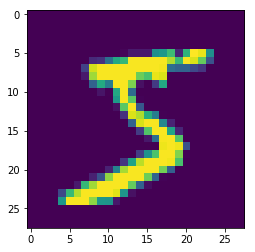

In [12]:
plt.imshow(image1.reshape(28,28))

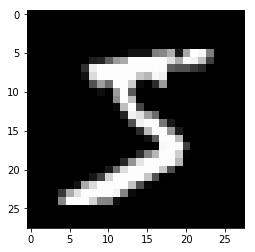

In [13]:
plt.imshow(image1.reshape((28,28)), cmap='gray')

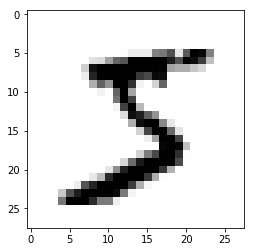

In [14]:
plt.imshow(image1.reshape((28,28)), cmap='gist_yarg')

In [15]:
torch.manual_seed(101) 

train_loader = DataLoader(train_data, batch_size=100, shuffle=True)

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)

In [16]:
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) #not compulsory; just to widen the printed array

In [17]:
# grabbing the first batch of images
for images,labels in train_loader: 
    break

In [18]:
images.shape

torch.Size([100, 1, 28, 28])

Labels:  [   0    5    7    8    6    7    9    7    1    3    8    4]


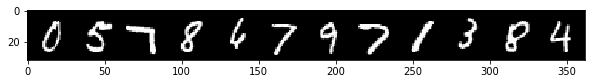

In [19]:
#printing the first 12 labels
print('Labels: ', labels[:12].numpy())
#printing the first 12 images
im = make_grid(images[:12], nrow=12)  # the default nrow is 8
plt.figure(figsize=(10,4))
#transposing the images from Channel-Width-Height to Width-Height-Channel
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [20]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]):
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0])
        self.fc2 = nn.Linear(layers[0],layers[1])
        self.fc3 = nn.Linear(layers[1],out_sz)
    
    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = self.fc3(X)
        return F.log_softmax(X, dim=1)

In [21]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [22]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [23]:
count_parameters(model)

 94080
   120
 10080
    84
   840
    10
______
105214


In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [25]:
#loading the first batch, print its shape
for images, labels in train_loader:
    print('Batch shape:', images.size())
    break
    
# EQUIVALENT TO:
# dataiter = iter(train_loader)
# images, labels = dataiter.next()
# print('Batch shape:', images.size())

Batch shape: torch.Size([100, 1, 28, 28])


In [26]:
images.view(100,-1).size() # -1 = 1 x 28 x 28

torch.Size([100, 784])

In [37]:
import time
start_time = time.time()

epochs = 10
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0
    tst_corr = 0
    
    #running the training batches
    for b, (X_train, y_train) in enumerate(train_loader):
        b+=1
        
        #applying the model
        y_pred = model(X_train.view(100, -1))  # Here X_train flattened
        #print(y_pred)
        loss = criterion(y_pred, y_train)
 
        # Tally the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1]
        #print("predicted")
        #print(predicted)
        batch_corr = (predicted == y_train).sum()
       # print("batch_corr")
        #print(batch_corr)
        trn_corr += batch_corr
        #print("trn_corr")
        #print(trn_corr)
        
        #updating parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print interim results
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    #updating train loss & accuracy for the epoch
    train_losses.append(loss)
    train_correct.append(trn_corr)
        

epoch:  0  batch:  200 [ 20000/60000]  loss: 0.00085937  accuracy:  99.815%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.00190946  accuracy:  99.843%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.00086126  accuracy:  99.788%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.04857290  accuracy:  99.765%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.00039552  accuracy:  99.765%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.01141690  accuracy:  99.718%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.02305289  accuracy:  99.765%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.01259683  accuracy:  99.787%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.00785793  accuracy:  99.770%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.00491694  accuracy:  99.560%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.00116542  accuracy:  99.642%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.00441234  accuracy:  99.720%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.06358090  accuracy:  99.940%
epoch:  4  b

In [38]:
#running the testing batches
with torch.no_grad():
    for b, (X_test, y_test) in enumerate(test_loader):

        # Apply the model
        y_val = model(X_test.view(500, -1))  # Here we flatten X_test

        # Tally the number of correct predictions
        predicted = torch.max(y_val.data, 1)[1] 
        tst_corr += (predicted == y_test).sum()
    
        #updating test loss & accuracy for the epoch
        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # printing the time elapsed 


Duration: 261 seconds


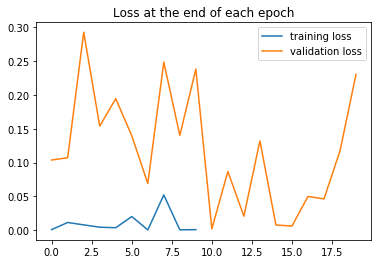

In [39]:
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();

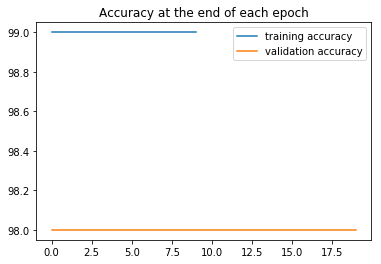

In [40]:
plt.plot([t/600 for t in train_correct], label='training accuracy')
plt.plot([t/100 for t in test_correct], label='validation accuracy')
plt.title('Accuracy at the end of each epoch')
plt.legend();

In [41]:
print(test_correct) # contains the results of all 10 epochs
print()
print(f'Test accuracy: {test_correct[-1].item()*100/10000:.3f}%') # print the most recent result as a percent

[tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800), tensor(9800)]

Test accuracy: 98.000%


In [42]:
#extracting the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

In [43]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')

Test accuracy: 9800/10000 =  98.000%


In [44]:
#printing a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}'))
print(np.arange(10).reshape(1,10))
print()

#printing the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1)))

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 970    0    0    1    2    2    1    0    4    2]
 [   0 1126    2    0    0    0    3    4    0    3]
 [   2    4 1011    5    1    0    0    8    1    1]
 [   0    0    7  986    0    6    1    0    4    3]
 [   1    0    1    0  963    1    1    2    2   11]
 [   1    0    1    7    0  871    7    0    7    2]
 [   3    2    3    0    4    5  942    0    2    0]
 [   0    1    4    4    2    1    0 1005    7    2]
 [   2    2    3    3    1    5    2    3  943    2]
 [   1    0    0    4    9    1    1    6    4  983]]


In [46]:
misses = np.array([])
for i in range(len(predicted.view(-1))):
    if predicted[i] != y_test[i]:
        misses = np.append(misses,i).astype('int64')
        
#displaying the number of misses
len(misses)

200

In [47]:
#displaying the first 10 index positions
misses[:10]

array([  33,  115,  124,  151,  217,  247,  321,  340,  447,  449],
      dtype=int64)

In [48]:
#setting up an iterator to feed batched rows
r = 12   # row size
row = iter(np.array_split(misses,len(misses)//r+1))

Index: [  33  115  124  151  217  247  321  340  447  449  530  582]
Label: [   4    4    7    9    6    4    2    5    4    3    9    8]
Guess: [   0    9    4    8    5    6    7    3    9    5    4    2]


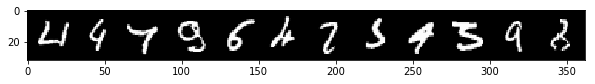

In [49]:
nextrow = next(row)
print("Index:", nextrow)
print("Label:", y_test.index_select(0,torch.tensor(nextrow)).numpy())
print("Guess:", predicted.index_select(0,torch.tensor(nextrow)).numpy())

images = X_test.index_select(0,torch.tensor(nextrow))
im = make_grid(images, nrow=r)
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));